In [1]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 567E-9C80

 Directory of C:\Users\sowik\source\repos\NNVisualiser\data_analysis\projekt1

13.03.2019  14:19    <DIR>          .
13.03.2019  14:19    <DIR>          ..
12.03.2019  12:17    <DIR>          .ipynb_checkpoints
11.03.2019  19:45    <DIR>          classification
13.03.2019  14:19           345ÿ088 data_analysis.ipynb
13.03.2019  10:19            20ÿ274 multiclassification.ipynb
11.03.2019  19:45    <DIR>          regression
13.03.2019  10:23            55ÿ410 regression.ipynb
               3 File(s)        420ÿ772 bytes
               5 Dir(s)  144ÿ915ÿ939ÿ328 bytes free


In [2]:
import sys,os 
os.chdir('.\..\..')

In [3]:
import deep_nn.deep_nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
train = pd.read_csv("./data_analysis/projekt1/classification/data.simple.train.100.csv")
test = pd.read_csv("./data_analysis/projekt1/classification/data.simple.test.100.csv")


In [5]:
X = train[['x', 'y']].values.T
print(X.shape)
Y = train.cls.values.reshape(1, len(train))
print(Y.shape)

(2, 100)
(1, 100)


In [6]:
Y == 1

array([[ True, False,  True,  True,  True,  True, False,  True, False,
         True, False,  True,  True,  True, False, False, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False,  True,  True, False,  True,  True,  True, False,
        False,  True, False, False, False,  True,  True,  True, False,
        False, False,  True,  True, False, False,  True,  True, False,
         True, False,  True, False, False, False, False,  True, False,
        False,  True,  True, False,  True,  True,  True, False, False,
         True, False,  True,  True, False,  True, False,  True,  True,
        False, False, False, False, False,  True,  True, False, False,
         True, False,  True,  True, False,  True, False, False, False,
         True]])

In [7]:
parameters, costs = nn.model(X, Y == 1, [2, 50, 50, 50, 1], num_epochs=10000)

Cost after epoch 0: 0.665039
Cost after epoch 1000: 0.375281
Cost after epoch 2000: 0.235696
Cost after epoch 3000: 0.202441
Cost after epoch 4000: 0.104567
Cost after epoch 5000: 0.140310
Cost after epoch 6000: 0.080999
Cost after epoch 7000: 0.067483
Cost after epoch 8000: 0.058529
Cost after epoch 9000: 0.036051


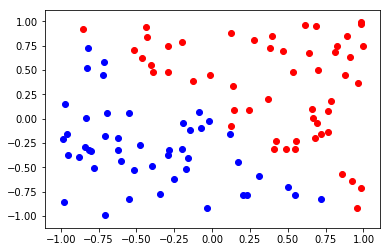

In [8]:
x0, y0 = X[:, (Y == 1)[0]]
plt.scatter(x0, y0, c='red')
x1, y1 = X[:, (Y == 2)[0]]
plt.scatter(x1, y1, c='blue')
plt.show()

In [9]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral)
    plt.show()
    

> c:\users\sowik\source\repos\nnvisualiser\deep_nn\deep_nn.py(493)predict_dec()
    491     # Forward propagation
    492     set_trace()
--> 493     probas, caches = L_model_forward(X, parameters)
    494     predictions = (probas > 0.5)
    495 

ipdb> continue


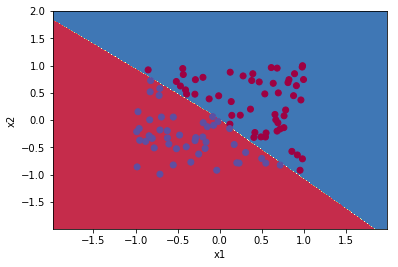

In [11]:
plot_decision_boundary(lambda x: nn.predict_dec(parameters, x.T), X, Y)

In [15]:
p = nn.predict_class(X, Y, parameters)

Accuracy: 0.53


In [13]:
x2, y2 = X[:, Yt == 0]
x3, y3 = X[:, Yt == 1]
plt.scatter(x0, y0, c='red')
plt.scatter(x1, y1, c='blue')
plt.scatter(x2, y2, c='pink')
plt.scatter(x3, y3, c='black')

plt.show()

NameError: name 'Yt' is not defined

In [116]:
X[:, Yt == 1] 

array([[-0.00292546,  0.50457062, -0.78926135,  0.89413174, -0.72043252,
         0.12407802,  0.26781533,  0.92533627, -0.27340721,  0.47969368,
         0.46771837,  0.81061794,  0.99310268, -0.49519323,  0.93904133,
        -0.13425343,  0.33340886, -0.65873245, -0.27513247,  0.53272045,
         0.50646966,  0.6620896 , -0.8371125 ,  0.46666345,  0.83128443,
         0.31617222, -0.65202812,  0.83102142, -0.56409885, -0.52932311,
         0.60296586, -0.37242396,  0.55403669, -0.1211271 , -0.7179681 ,
         0.62786173,  0.51060576, -0.0762262 , -0.40120671, -0.87402726,
        -0.17034607,  0.35783137, -0.29091532,  0.75151501,  0.77097076,
         0.50381143, -0.54955623,  0.46241343, -0.09362893, -0.61625271,
        -0.0795782 , -0.54247365, -0.05663423],
       [-0.95479958, -0.09202067, -0.56327302,  0.06988364, -0.7235403 ,
        -0.48088381,  0.01233009,  0.13233564,  0.01997311, -0.88828545,
        -0.76757214,  0.16648831, -0.87522862, -0.84073934,  0.52907649,
   

In [2]:
train1000 = pd.read_csv("./data_analysis/projekt1/classification/data.simple.train.1000.csv")
test1000 = pd.read_csv("./data_analysis/projekt1/classification/data.simple.test.1000.csv")
n = len(train1000)
X = train1000[['x', 'y']].values.reshape(2, n)
Y = train1000.cls.values.reshape(1, n)
Y = (Yt == 1).astype(float)
Xt = test1000[['x', 'y']].values.reshape(2, n)
Yt = test1000.cls.values.reshape(1, n)
Yt = (Yt == 1).astype(float)[0]

NameError: name 'Yt' is not defined

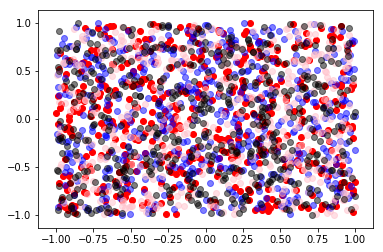

In [135]:
x0, y0 = X[:, Y == 0]
x1, y1 = X[:, Y == 1]

x2, y2 = Xt[:, Yt == 0]
x3, y3 = Xt[:, Yt == 1]
plt.scatter(x0, y0, c='red')
plt.scatter(x1, y1, c='blue', alpha=0.5)
plt.scatter(x2, y2, c='pink', alpha=0.5)
plt.scatter(x3, y3, c='black', alpha=0.5)

In [133]:
Y

1.0

In [2]:
train1000 = pd.read_csv("./data_analysis/projekt1/regression/data.activation.train.1000.csv")
test1000 = pd.read_csv("./data_analysis/projekt1/regression/data.activation.test.1000.csv")
len(train1000)

1000

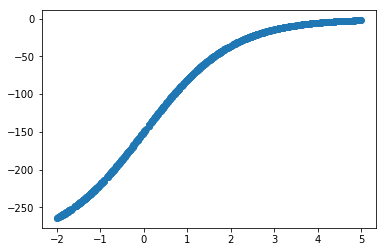

In [14]:
plt.scatter(train1000.x, train1000.y)

In [3]:
X = train1000.x.values.reshape(1, -1)
print(X.shape)
Y = train1000.y.values.reshape(1, -1)
print(Y.shape)

(1, 1000)
(1, 1000)


In [17]:
nn.model(X, Y, [1, 1], ["relu", "linear"], cost_func="MSE")

Cost after epoch 0: 284414.641689
Cost after epoch 1000: 331724.099238
Cost after epoch 2000: 206096.828458
Cost after epoch 3000: 281460.939838
Cost after epoch 4000: 335116.026817
Cost after epoch 5000: 368659.246426
Cost after epoch 6000: 299560.850940
Cost after epoch 7000: 315191.448037
Cost after epoch 8000: 413756.274847
Cost after epoch 9000: 370641.129823


{'W1': array([[0.17188417]]), 'b1': array([[-0.97568291]])}

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
print()

In [6]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X_scaled = X_scaler.fit_transform(train1000.x.values.reshape(-1, 1)).reshape(1, -1)
Y_scaled = Y_scaler.fit_transform(train1000.y.values.reshape(-1, 1)).reshape(1, -1)
print(Y_scaler.data_range_)
print(X_scaler.data_range_)
print(X_scaled.shape)
print(Y_scaled.shape)


[262.0099222]
[6.97754216]
(1, 1000)
(1, 1000)


In [22]:
parameters_small = nn.model(X_scaled, Y_scaled, [1, 1], ["relu", "linear"], cost_func="MSE")

Cost after epoch 0: 2.228288
Cost after epoch 1000: 0.311431
Cost after epoch 2000: 0.258410
Cost after epoch 3000: 0.187689
Cost after epoch 4000: 0.166705
Cost after epoch 5000: 0.178046
Cost after epoch 6000: 0.226467
Cost after epoch 7000: 0.181352
Cost after epoch 8000: 0.163333
Cost after epoch 9000: 0.240489


In [13]:
parameters = nn.model(X_scaled, Y_scaled, [1, 12, 12, 12, 12, 1], ["relu", "relu", "relu", "relu", "relu", "sigmoid"], cost_func="MSE", beta=0.9, mini_batch_size=64)

Cost after epoch 0: 0.464179
Cost after epoch 1000: 0.006405
Cost after epoch 2000: 0.005248
Cost after epoch 3000: 0.003542
Cost after epoch 4000: 0.002131
Cost after epoch 5000: 0.001343
Cost after epoch 6000: 0.001293
Cost after epoch 7000: 0.000591
Cost after epoch 8000: 0.000421
Cost after epoch 9000: 0.000277


In [17]:
parameters = nn.model(X_scaled, Y_scaled, [1, 12, 12, 12, 12, 1], ["relu", "relu", "relu", "relu", "relu", "sigmoid"], cost_func="MSE", beta=0, mini_batch_size=1024, num_epochs=100000)

Cost after epoch 0: 439.389459
Cost after epoch 1000: 22.895287
Cost after epoch 2000: 15.088349
Cost after epoch 3000: 11.433531
Cost after epoch 4000: 9.698246
Cost after epoch 5000: 8.848595
Cost after epoch 6000: 8.430876
Cost after epoch 7000: 8.218292
Cost after epoch 8000: 8.090566
Cost after epoch 9000: 7.998418
Cost after epoch 10000: 7.912107
Cost after epoch 11000: 7.805730
Cost after epoch 12000: 7.575672
Cost after epoch 13000: 7.219122
Cost after epoch 14000: 7.098910
Cost after epoch 15000: 6.988810
Cost after epoch 16000: 6.881755
Cost after epoch 17000: 6.777619
Cost after epoch 18000: 6.676140
Cost after epoch 19000: 6.577264
Cost after epoch 20000: 6.480186
Cost after epoch 21000: 6.385435
Cost after epoch 22000: 6.293108
Cost after epoch 23000: 6.202525
Cost after epoch 24000: 6.113606
Cost after epoch 25000: 6.025840
Cost after epoch 26000: 5.938604
Cost after epoch 27000: 5.851711
Cost after epoch 28000: 5.764200
Cost after epoch 29000: 5.664186
Cost after epoch 3

In [23]:
y_pred_small = nn.predict(parameters_small, X_scaled)

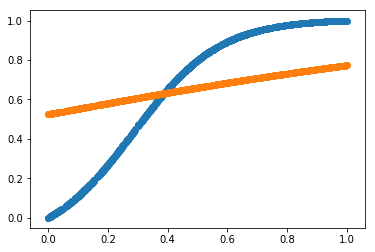

In [24]:

plt.autoscale(enable=True, axis='both', tight=None)
plt.scatter(X_scaled, Y_scaled)
plt.scatter(X_scaled, y_pred_small)
plt.show()

In [9]:
y_pred = nn.predict(parameters, X_scaled)

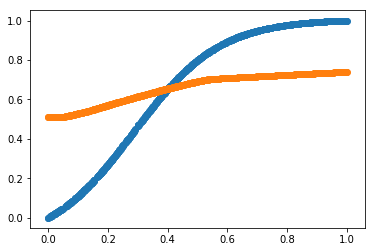

In [10]:

plt.autoscale(enable=True, axis='both', tight=None)
plt.scatter(X_scaled, Y_scaled)
plt.scatter(X_scaled, y_pred)
plt.show()

In [7]:
parameters2, costs = nn.model(X_scaled, 
                      Y_scaled, 
                      [1, 130, 13, 1], 
                      ["relu", "relu", "relu", "linear"], 
                      cost_func="MSE", 
                      beta=0.9, 
                      mini_batch_size=64)


Cost after epoch 0: 11.828997
Cost after epoch 1000: 10.354643
Cost after epoch 2000: 12.389456
Cost after epoch 3000: 11.013968
Cost after epoch 4000: 10.604758
Cost after epoch 5000: 9.878738
Cost after epoch 6000: 11.138250
Cost after epoch 7000: 11.168177
Cost after epoch 8000: 9.517203
Cost after epoch 9000: 10.340597


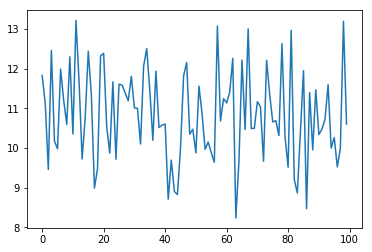

In [8]:
plt.plot(costs)

In [9]:
y_pred2 = nn.predict(parameters2, X_scaled)

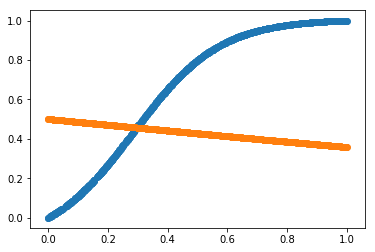

In [10]:
plt.autoscale(enable=True, axis='both', tight=None)
plt.scatter(X_scaled, Y_scaled)
plt.scatter(X_scaled, y_pred2)
plt.show()

In [57]:


from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor


In [96]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(1, input_dim=1, kernel_initializer='normal', activation='relu'))
    model.add(Dense(130, kernel_initializer='normal', activation='relu'))
    model.add(Dense(13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='sgd')
    return model

In [97]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=10000, batch_size=64)


In [84]:
X_s = X_scaled.reshape(-1, 1)
X_s.shape

Y_s = Y_scaled.reshape(-1, 1)
Y_s.shape

(1000, 1)

In [91]:
print()

In [98]:
history = estimator.fit(X_s, Y_s, verbose=0)


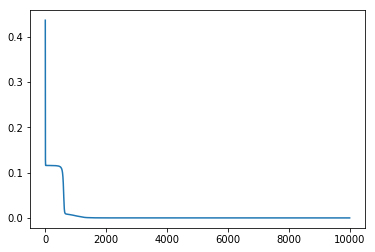

In [99]:
plt.plot(history.history['loss'])

In [100]:
y_pred_keras = estimator.predict(X_s)


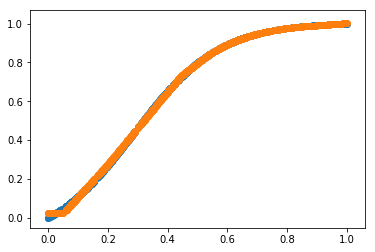

In [101]:
plt.autoscale(enable=True, axis='both', tight=None)
plt.scatter(X_s, Y_s)
plt.scatter(X_s, y_pred_keras)
plt.show()